# Destination Selection in Seattle, Washington.

A data-based approach using Seattle Airbnb Open Survey Data (Version 2).

This notebook explore analysis of Seattle Airbnb data in dicussing tourist activities.


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1) Business Understanding


I am interested in analyzing tourists' activities, choices and satisfaction in the city of Seattle, Washinton, using the Seattle Airbnb Open Data. For this task, I will exploring answers to the following:


1) What is the property preference of most Airbnb subscribers in the region? Is it houses, apartments, cabins or bungalows?.

2) Where is the most popular neighbourhood destination for majority respondents in the Seattle region?

3) Which neighbourhood would continue to record an increasing number of tourists based on previous visitors' rating score?

## 2) Data Understanding

Gather data

In [3]:
# Read in data file and store as dataframe variable df
df = pd.read_csv('./listings.csv')

df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


#### Details of data

In [4]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
# show number of rows and columns available
num_rows = df.shape[0] 
num_columns = df.shape[1]

print('There are {} rows and {} columns in the data'.format(num_rows,num_columns))

There are 3818 rows and 92 columns in the data


In [6]:
# display attributes/columns in the data
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## 3) Prepare Data

#### Clean

First, we will prepare the data into a form which would be accessible for our 
analysis

1) remove unused columns

2) check for rows and attributes with missing data

3) handle the missing data


In [7]:
# select a list of important attributes
df = df[['neighbourhood', 'property_type', 'price', 'review_scores_rating', 'number_of_reviews']]

df.head()

,neighbourhood,property_type,price,review_scores_rating,number_of_reviews
0,Queen Anne,Apartment,$85.00,95.0,207
1,Queen Anne,Apartment,$150.00,96.0,43
2,Queen Anne,House,$975.00,97.0,20
3,Queen Anne,Apartment,$100.00,NaN,0
4,Queen Anne,House,$450.00,92.0,38


In [8]:
# identify columns with missing values
print(df.isnull().sum())

neighbourhood           416
property_type             1
price                     0
review_scores_rating    647
number_of_reviews         0
dtype: int64


## Answer Questions

### Task 1 - What property types are most suitable for tourists?

In [9]:
# explore missing values in the property_type attribute
nos_missing = pd.isnull(df['property_type']).sum()
nos_missing

1

In [10]:
## handle the missing value in the property_type attribute
remove_missing = df.dropna(subset=['property_type'], how='any')
remove_missing.head()

,neighbourhood,property_type,price,review_scores_rating,number_of_reviews
0,Queen Anne,Apartment,$85.00,95.0,207
1,Queen Anne,Apartment,$150.00,96.0,43
2,Queen Anne,House,$975.00,97.0,20
3,Queen Anne,Apartment,$100.00,NaN,0
4,Queen Anne,House,$450.00,92.0,38


In [11]:
# explore the details of the property_type attribute
df['property_type'].head()

0    Apartment
1    Apartment
2        House
3    Apartment
4        House
Name: property_type, dtype: object

In [12]:
df['property_type'].describe()

count      3817
unique       16
top       House
freq       1733
Name: property_type, dtype: object

#### Analyze


In [13]:
# Distribution of property types in Seattle city
general_property =  df.property_type.value_counts()
general_property

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [14]:
(general_property/df.shape[0])

House              0.453903
Apartment          0.447355
Townhouse          0.030906
Condominium        0.023834
Loft               0.010477
Bed & Breakfast    0.009691
Other              0.005762
Cabin              0.005500
Camper/RV          0.003405
Bungalow           0.003405
Boat               0.002095
Tent               0.001310
Treehouse          0.000786
Dorm               0.000524
Chalet             0.000524
Yurt               0.000262
Name: property_type, dtype: float64

#### Visualize

Display the property distribution data

In [15]:
# Plot property_type distribution graph 

def plotGraph(df, colum, title, xlabel, ylabel, click):
    """
    This function plots property types distribution graph 
    
    Args:
        df (dataframe): contains the data dataframe
        colum (Attributes analysis): property types value counts
        title (string): title of graph
        xlabel (string): vertical title
        ylabel (string): horizontal title
        click (int): whether the whole graph should display (0) or the top five graph display (1)
    
    Returns:
        None
    """
    
    if click == 0:
        (colum/df.shape[0]).plot(kind='bar')
    else:
        (colum[:5]/df.shape[0]).plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    


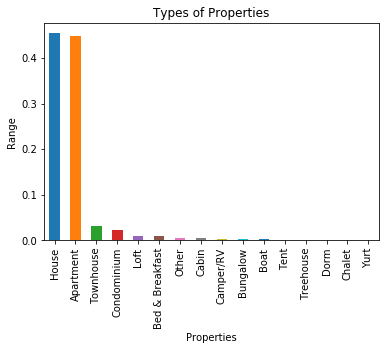

In [16]:
# plot graph of all Property types
plotGraph(df, general_property, "Types of Properties", "Properties", "Range", 0)

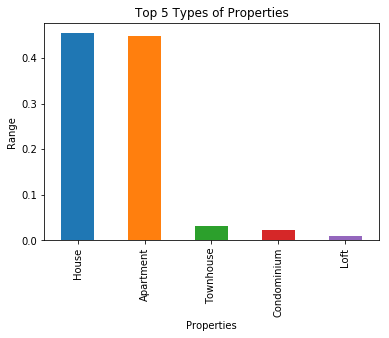

In [17]:
# plot graph of top 5 Property types
plotGraph(df, general_property[:], "Top 5 Types of Properties", "Properties", "Range", 1)

### Task 2 - Most Popular Destination in Seattle

In [18]:
# explore the details of the neighbourhood attribute
neighbourhood_attribute =  df['neighbourhood']
neighbourhood_attribute.head()

0    Queen Anne
1    Queen Anne
2    Queen Anne
3    Queen Anne
4    Queen Anne
Name: neighbourhood, dtype: object

In [19]:
df['neighbourhood'].describe()

count             3402
unique              81
top       Capitol Hill
freq               351
Name: neighbourhood, dtype: object

#### Analyze

In [20]:
# Distribution of neighbourhood types in Seattle city
neighbourhood_attribute =  df.neighbourhood.value_counts()
neighbourhood_attribute.head()

Capitol Hill    351
Ballard         213
Belltown        204
Minor           192
Queen Anne      187
Name: neighbourhood, dtype: int64

In [21]:
# drop missing values in the neighbourhood attribute
neighbourhood_attribute =  df.neighbourhood.value_counts().dropna()
neighbourhood_attribute.head()

Capitol Hill    351
Ballard         213
Belltown        204
Minor           192
Queen Anne      187
Name: neighbourhood, dtype: int64

In [22]:
(neighbourhood_attribute/df.shape[0]).head()

Capitol Hill    0.091933
Ballard         0.055788
Belltown        0.053431
Minor           0.050288
Queen Anne      0.048979
Name: neighbourhood, dtype: float64

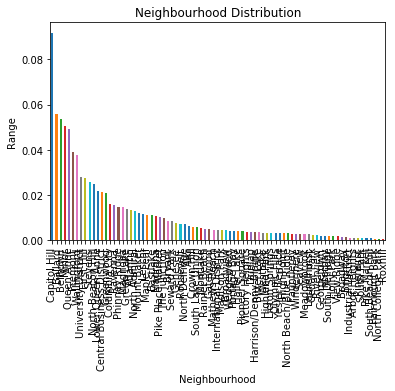

In [23]:
# plot graph of all Property types
plotGraph(df, neighbourhood_attribute, "Neighbourhood Distribution", "Neighbourhood", "Range", 0)

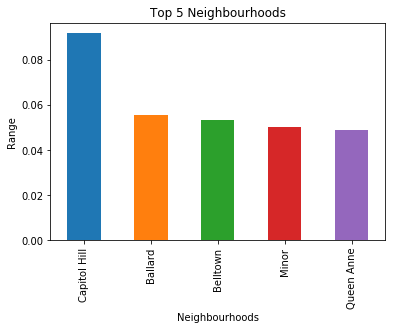

In [24]:
# plot graph of top 5 Property types
plotGraph(df, neighbourhood_attribute[:], "Top 5 Neighbourhoods", "Neighbourhoods", "Range", 1)

## 5) Inferential statistics 

### Task 3 - Which neighbourhood would continue to record an increasing number of tourists based on previous tourists' rating scores?

In [25]:
# Analyze the neighbourhood attribute in relation to the number of review score given by past tourists
neighbourhood_review_rating = df.groupby('neighbourhood')['number_of_reviews'].sum()
neighbourhood_review_rating.head()

neighbourhood
Alki              367
Arbor Heights      46
Atlantic         1149
Ballard          7110
Belltown         4332
Name: number_of_reviews, dtype: int64

In [26]:
# Analyze the neighbourhood attribute in relation to the number of review score given by past tourists
neighbourhood_review_rating = df.groupby('neighbourhood', as_index=True).agg({"review_scores_rating": "sum"}).dropna()
neighbourhood_review_rating = neighbourhood_review_rating.sort_values('review_scores_rating', ascending=False)
neighbourhood_review_rating.head()

,review_scores_rating
neighbourhood,
Capitol Hill,26863.0
Ballard,17455.0
Belltown,16988.0
Minor,16737.0
Queen Anne,15580.0


#### Evaluation

Clearly, it could be infered that more tourists would tend to visit Capitol Hill or Ballard. This could be possible becuase, regions with higher rating scores would maintain a higher number of vacationists as people would likely recommend nice spots to their contemporaries for vacation. 

On the other hand, places with higher visits but low reviews such as University Districts and Stevens could experience a decline in tourist activities.



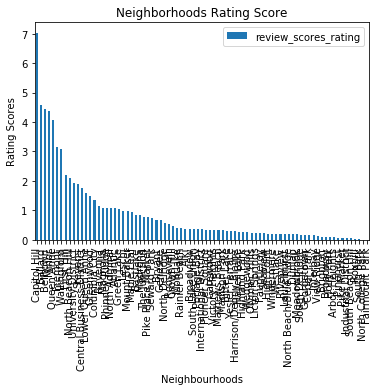

In [27]:
# plot graph of all Rated Neighborhoods
plotGraph(df, neighbourhood_review_rating, "Neighborhoods Rating Score", "Neighbourhoods", "Rating Scores", 0)

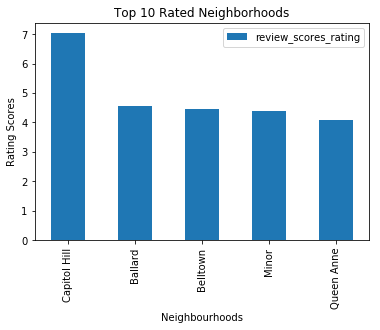

In [28]:
# plot graph of top 5 Rated Neighborhoods
plotGraph(df, neighbourhood_review_rating[:], "Top 10 Rated Neighborhoods", "Neighbourhoods", "Rating Scores", 1)